In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


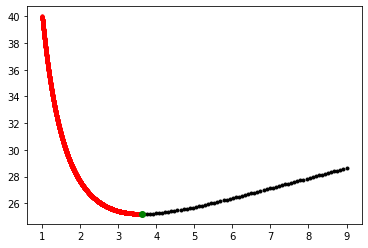

[3.636319922020615]
25.200825995266072
4444


In [2]:
from numpy.core.fromnumeric import resize
X=[1,2,3,3,7,3,5,4,6,2,4]
Sx=sum(X)
N=len(X)
func = lambda th: N*np.log(th[0])+ Sx/th[0]


#Representacion 

_x =np.linspace(1,9, 100)
_y=np.zeros(100)
for ix, x in enumerate(_x):
  _y[ix]=func([x])

plt.plot(_x,_y, ".", c = "black")


#Algoritmo Adadelta
Theta = [1]
li=0.9
E=10**(-8)
plt.plot(Theta[0],func(Theta), "o", c = "white")

grad=np.zeros(1)
Var=[0]
Eg = [0]
Evar=[0]
Thetaold = [0]
contador= 0
diferencia=1

for _ in range(10000):

  if diferencia < 10**-5:
    break
  else:
    grad[0] = N/Theta[0] - Sx/Theta[0]**2
  #print(grad))


    for it, th in enumerate(Theta):
      Eg[it]= li*Eg[it]+ (1-li)*grad[it]**2
      Evar[it]= li*Evar[it]+ (1-li)*Var[it]**2

    #print(Eg)
    #print(Evar)

    for it, th in enumerate(Theta): 
      Thetaold [it] = Theta[it]
      Theta[it] = Theta[it] - np.sqrt(Evar[it]+E)*grad[it]/ np.sqrt(Eg[it]+E)
      Var[it]= Theta[it]-Thetaold[it]
    plt.plot(Theta[0],func(Theta), ".", c = "red")

    diferencia=np.sqrt((Thetaold[0]-Theta[0])**2)
    #print(diferencia)
    contador=contador+1

plt.plot(Theta[0],func(Theta), "o", c = "green")  
plt.show()
print(Theta)
print(func(Theta))
print(contador)

